In [43]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as pltpeople 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [47]:
df = pd.read_csv('sampled_dataset.csv') 
len(df)

40000

In [65]:
df.sample(5)

,label,tweet,sentiment,text
20005,0,My sunburn is starting to hurt now,Negative,my sunburn is starting to hurt now
14662,1,http://twitpic.com/5eh8c - in melbourne,Positive,in melbourne
27983,1,"Indo pra minha casinha, relaxar Take easy my...",Positive,indo pra minha casinha relaxar take easy my br...
28225,1,"I'm going home tomorrow!!! I heart Melbourne, ...",Positive,im going home tomorrow i heart melbourne even ...
29672,1,@terikris Congratulations you two! May you not...,Positive,congratulations you two may you not suffer les...


In [49]:
df['tweet'] = df['tweet'].astype(str)

In [50]:
valid_sentiments = [4,0]
df = df[df['label'].isin(valid_sentiments)]

In [51]:
df['label'].value_counts()

0    10000
4    10000
Name: label, dtype: int64

In [53]:
df.loc[df['label'] == 4,'label'] = 1

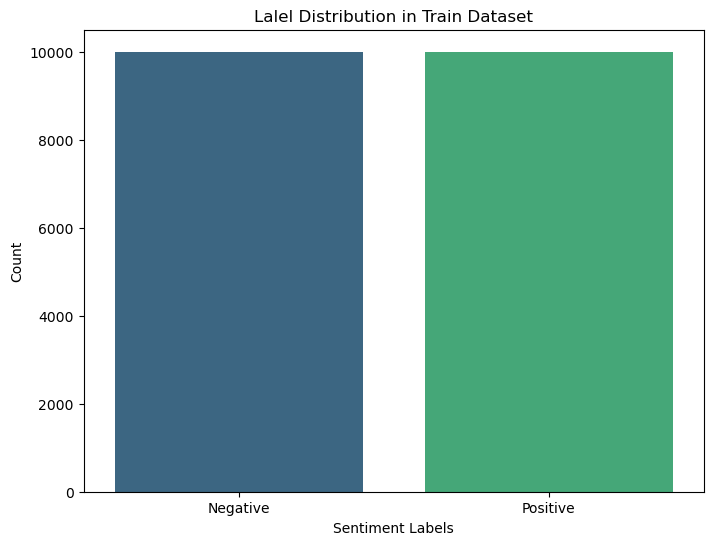

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'Negative', 1: 'Positive'}
df['sentiment'] = df['label'].map(label_mapping)
# Class Distribution in 'label' column with 'viridis' color palette
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution in Training Dataset')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()

In [8]:
import re

def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)
    
    # Remove mentions and hashtags
    tweet = re.sub(r"@\w+|#\w+", "", tweet)
    
    # Remove special characters and numbers
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove extra whitespaces
    tweet = re.sub(r"\s+", " ", tweet).strip()
    
    return tweet

In [64]:
df['text'] = df['tweet'].apply(clean_tweet)

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_24460\3700386273.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['tweet_length'], bins=50, palette='viridis')


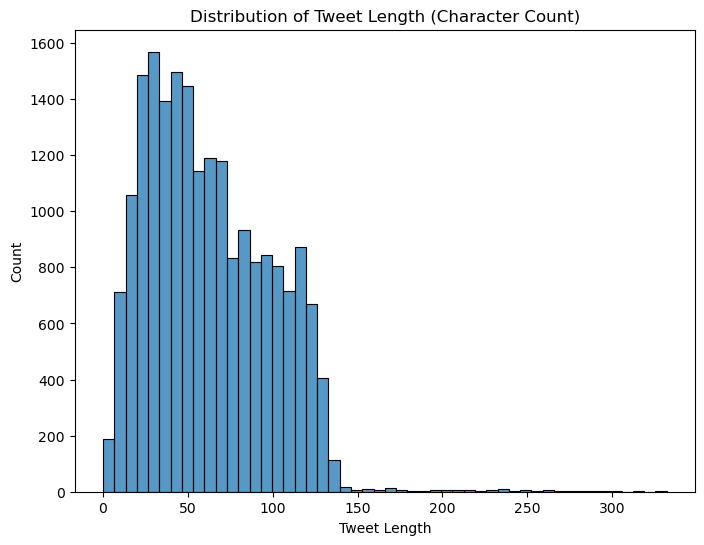

In [67]:
# Calculate and visualize the length of tweets
df['tweet_length'] = df['text'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(df['tweet_length'], bins=50, palette='viridis')
plt.title("Distribution of Tweet Length (Character Count)")
plt.xlabel("Tweet Length")
plt.ylabel("Count")
plt.show()

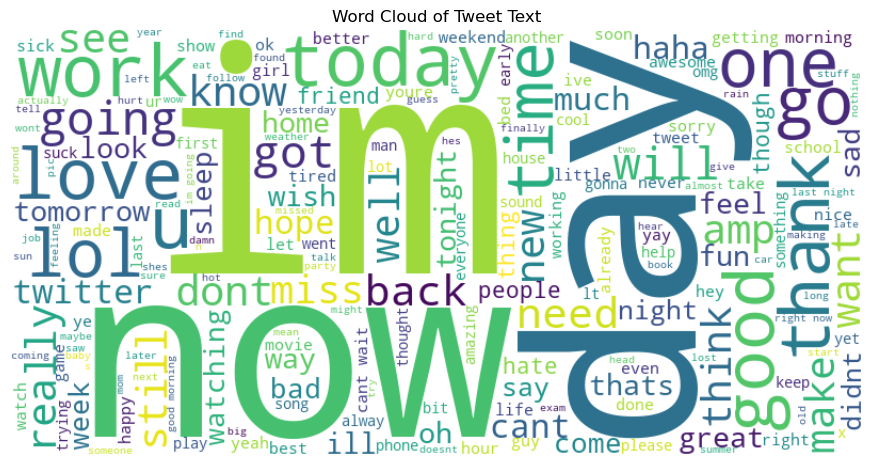

In [70]:
from wordcloud import WordCloud
# Generate a word cloud from the tweet text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))

plt.figure(figsize=(11, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Tweet Text")
plt.axis('off')
plt.show()

In [11]:
X = df['text'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [26]:
max_sequence_length = 100  # Choose an appropriate sequence length

X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [29]:
# Choose an appropriate sequence length
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100  # Choose an appropriate embedding dimension

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=256))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=10, batch_size=32)

Epoch 1/10
500/500 [==============================] - 130s 258ms/step - loss: 0.5793 - accuracy: 0.7071 - val_loss: 0.5052 - val_accuracy: 0.7610
Epoch 2/10
500/500 [==============================] - 128s 256ms/step - loss: 0.3794 - accuracy: 0.8374 - val_loss: 0.5267 - val_accuracy: 0.7455
Epoch 3/10
500/500 [==============================] - 128s 256ms/step - loss: 0.2576 - accuracy: 0.8966 - val_loss: 0.6522 - val_accuracy: 0.7327
Epoch 4/10
500/500 [==============================] - 128s 255ms/step - loss: 0.1778 - accuracy: 0.9316 - val_loss: 0.7090 - val_accuracy: 0.7237
Epoch 5/10
500/500 [==============================] - 137s 274ms/step - loss: 0.1292 - accuracy: 0.9499 - val_loss: 0.8467 - val_accuracy: 0.7135
Epoch 6/10
500/500 [==============================] - 135s 271ms/step - loss: 0.1001 - accuracy: 0.9602 - val_loss: 0.9376 - val_accuracy: 0.7205
Epoch 7/10
500/500 [==============================] - 136s 271ms/step - loss: 0.0755 - accuracy: 0.9721 - val_loss: 1.2217 -

In [28]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


ValueError: in user code:

    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_5' (type Sequential).
    
    Input 0 of layer "lstm_5" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (32, 100)
    
    Call arguments received by layer 'sequential_5' (type Sequential):
      • inputs=tf.Tensor(shape=(32,), dtype=string)
      • training=True
      • mask=None


In [30]:
# Evaluate the model on the test data (assuming you have X_test and y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

ValueError: in user code:

    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1850, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "lstm_6" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (32, 100)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(32,), dtype=string)
      • training=False
      • mask=None


In [32]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1945100   
                                                                 
 lstm_6 (LSTM)               (None, 256)               365568    
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2310925 (8.82 MB)
Trainable params: 2310925 (8.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [144]:
from keras.utils import plot_model

# Assuming you have already created and compiled your Keras model (named 'model')
# Plot the model architecture to a file (e.g., 'model.png')
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the model architecture in the Jupyter Notebook
from IPython.display import Image
Image(filename='model.png')


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


FileNotFoundError: [Errno 2] No such file or directory: 'model.png'

In [33]:
y_pred = model.predict(X_test_pad)


125/125 [==============================] - 7s 56ms/step


In [34]:
y_pred_binary = (y_pred > 0.5).astype(int)


In [35]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[1521  538]
 [ 616 1325]]


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.71
Precision: 0.71
Recall: 0.68
F1 Score: 0.70


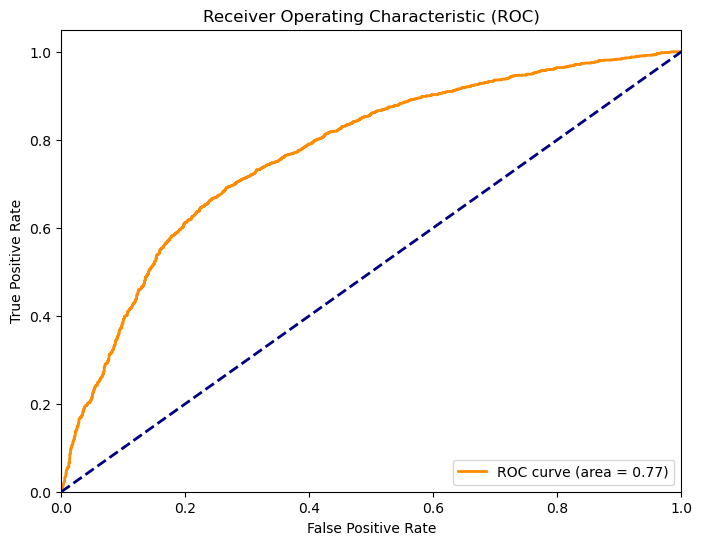

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


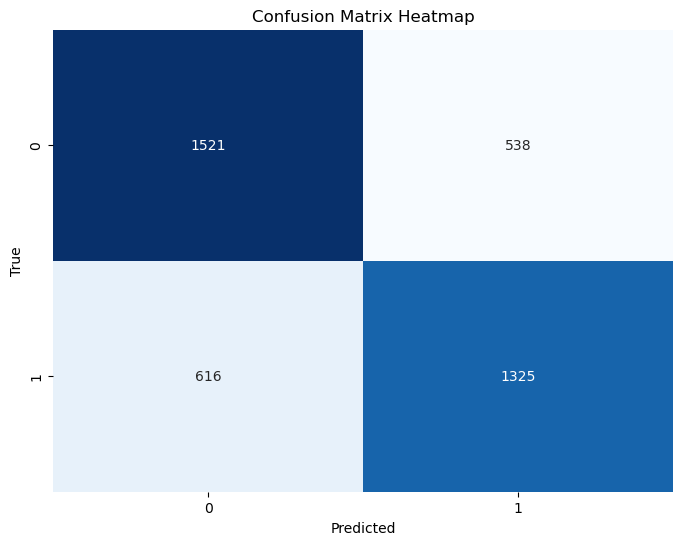

In [38]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


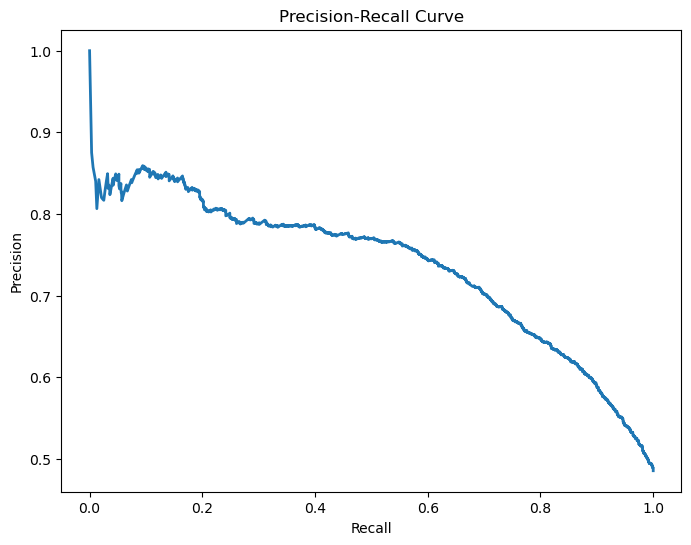

In [39]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [155]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_binary, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.73      0.72      2059
    Positive       0.71      0.69      0.70      1941

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000



In [93]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Custom input text (replace with your own text)
custom_text = '''I feel normal'''
# Preprocess the custom input text (use the same preprocessing function)
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)
    
    # Remove mentions and hashtags
    tweet = re.sub(r"@\w+|#\w+", "", tweet)
    
    # Remove special characters and numbers
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove extra whitespaces
    tweet = re.sub(r"\s+", " ", tweet).strip()
    
    return tweet

# Tokenize and pad the custom input text
custom_text = clean_tweet(custom_text)  # Preprocess the text
print(custom_text)
print([custom_text])
custom_seq = tokenizer.texts_to_sequences([custom_text])
print(custom_seq)
custom_seq = pad_sequences(custom_seq, maxlen=max_sequence_length)  # Pad the sequence

# Make predictions with the model
custom_sentiment_prob = model.predict(custom_seq)[0][0]

# Define custom sentiment categories and thresholds
thresholds = [(0.9, "Highly Positive"), (0.7, "Positive"), (0.5, "Neutral"), (0.3, "Negative")]

# Initialize custom_sentiment to "Highly Negative" by default
custom_sentiment = "Highly Negative"

# Determine sentiment based on the probability and thresholds
for threshold, sentiment_label in thresholds:
    if custom_sentiment_prob >= threshold:
        custom_sentiment = sentiment_label
        break  # Break the loop once a matching threshold is found

# Print the sentiment and probability score
print(f"Sentiment: {custom_sentiment}")
print(f"Sentiment Probability: {custom_sentiment_prob:.4f}")

print(tokenizer)

i feel normal
['i feel normal']
[[1, 112, 1087]]
1/1 [==============================] - 0s 26ms/step
Sentiment: Highly Negative
Sentiment Probability: 0.0002


In [88]:
import os
from tensorflow.keras.models import load_model

# Save the trained model to an HDF5 file
model.save("sentiment_model.h5")

# Get the current working directory
current_directory = os.getcwd()

# Print the current directory
print("Model saved in directory:", current_directory)



Model saved in directory: C:\Users\ADITYA


In [89]:
import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [102]:
import requests
from bs4 import BeautifulSoup
def scrape_text_from_link(link):
    try:
        response = requests.get(link)
        soup = BeautifulSoup(response.content, "html.parser")
        # Assuming the text is contained within <p> elements
        text = soup.get_text()
        text = clean_tweet(text)
        return text
    except Exception as e:
        return str(e)

In [104]:
scrape_text_from_link('https://www.instagram.com/p/Cw95Nf4Bz06/?img_index=1')

'anurag kashyap on instagram fully jetlagged my first day at the at and i run into was surprised to see how young he is and saw him enthusiastically introduce takashi nomuras a colt is my passport reminded me of raghavanofficial and how nerdy and geeky and delightful are the genre filmmakers kennedy plays here on the th and th'

Emotion Analysis

In [85]:
df1=pd.read_csv('text_emotion.csv')
df1.sample(15)

,tweet_id,sentiment,author,content
22700,1753009229,love,SharElizabeth,Happy Mother's Day!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
8117,1963332309,worry,JUICYMOana,made my dad kool aid and it taste like shit
10330,1964686393,worry,ChickenStudios,@Remy_Foster Still not working
9224,1963994502,worry,burhop,@mleshock Noooo! Poor SE
11447,1965388653,worry,DangerousBoots,owe i just burnt my hand on the toaster oven
5847,1962170180,love,typicaal,"Went to the hairdresser today, she cutted my h..."
3845,1960910316,worry,megg_xo,ive got a headache now
3664,1960754647,sadness,velabonz,missing ontario..
10129,1964595255,happiness,cmpriest,@formicadinette - Yipe! I'm sorry to hear that
11495,1965408533,worry,midniteonabeach,@markhoppus Are we going to be able to buy mor...


In [86]:
df1['sentiment'].value_counts(normalize=True)

worry        0.328212
happiness    0.271020
sadness      0.200365
love         0.149071
hate         0.051333
Name: sentiment, dtype: float64

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25773 entries, 0 to 25772
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   25773 non-null  int64 
 1   sentiment  25773 non-null  object
 2   author     25773 non-null  object
 3   content    25773 non-null  object
dtypes: int64(1), object(3)
memory usage: 805.5+ KB


In [76]:
df1.shape

(25773, 4)

In [87]:
# Checking for missing values in the train datase
df1.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

In [84]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADITYA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [98]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import string
import numpy as np

# Sample text data
text_data =  df1['content'].tolist()
# Tokenization and Lowercasing
def preprocess_text(text):
    # Tokenization: Split text into words
    words = nltk.word_tokenize(text.lower())
    
    # Removing punctuation and stopwords
    words = [word for word in words if word not in string.punctuation]
    words = [word for word in words if word not in stopwords.words('english')]
    
    return " ".join(words)

# Preprocess the text data
#preprocessed_data = [preprocess_text(text) for text in text_data]
#print(preprocessed_data)

df1['text'] = df1['content'].apply(preprocess_text)


In [99]:
df1.sample(5)

,tweet_id,sentiment,author,content,text
842,1957261056,sadness,spacecadet007,because my dad has the tv to loud. Then i get ...,dad tv loud get creeped cuz im dodgy neighbour...
21157,1752322715,happiness,cwarden,Today is not lost,today lost
22212,1752822515,happiness,megsly07,"@faeriegal713 Yep, finished, chocked full of s...",faeriegal713 yep finished chocked full spellin...
3316,1960532185,worry,DecemberDoll,@Keitakeita girl you stay inviting me but not ...,keitakeita girl stay inviting follow-up hahaha...
21249,1752383079,love,sweets_89,Love ice cream... Love cake... Cookies and cre...,love ice cream ... love cake ... cookies cream...


In [ ]:
# Word2Vec Embedding
# Train a Word2Vec model on the preprocessed text data
model = Word2Vec(sentences=preprocessed_data, vector_size=100, window=5, min_count=1, sg=0)

# Convert text data to numerical format using Word2Vec embeddings
def text_to_word2vec(text, model):
    word_vectors = []
    for word in text:
        if word in model.wv:
            word_vectors.append(model.wv[word])
    if not word_vectors:
        # If no valid word vectors are found, return a vector of zeros
        return [np.zeros(model.vector_size)]
    return word_vectors


In [ ]:
# Apply Word2Vec embedding to each preprocessed text
numerical_data = [text_to_word2vec(text, model) for text in preprocessed_data]

# Example of how to access the numerical data for the first text sample
print(numerical_data[0])

In [92]:
import pandas as pd

# Assuming df1 is your DataFrame and 'content' is the name of the Series
content_series = df1['content']

# Check the number of samples in the input data
num_samples_input_data = len(content_series)
print(num_samples_input_data)
# Check the number of samples in your target labels
num_samples_target_labels = len(y_train)
print(num_samples_target_labels)

25773
16000


ValueError: Found input variables with inconsistent numbers of samples: [25773, 5]